# OpenCV 이미지 변형

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 이미지 크기 변경

cv2.resize(image, dsize, fx, fy, interpolation)

- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법 (사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법)
 - INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
 - INTER_AREA: 사이즈를 작게 할 때 주로 사용

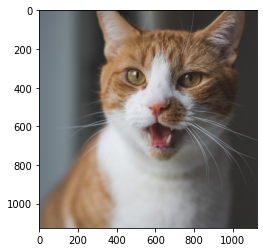

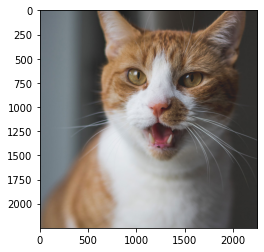

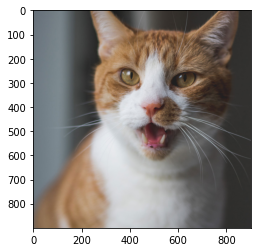

In [8]:
image = cv2.imread("cat.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC) # 세로, 가로를 2배씩 늘어나도록 확대
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)  # 세로, 가로를 0.8배씩 줄이도록 축소
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 위치 변경

cv2.warpAffine(image, M, dsize) : 이미지의 위치를 변경

- M: 변환 행렬
- dsize: Manual Size

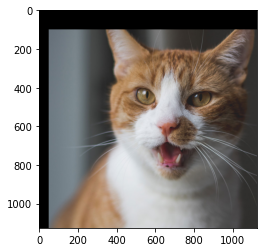

In [21]:
# 행과 열 정보만 저장
height, width = image.shape[:2]

M = np.float32([[1, 0, 50], [0, 1, 100]])
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 회전

- 회전 변환을 위한 기본적인 행렬 : 

 $ \begin{pmatrix}
  cos \theta & -sin \theta \\
  sin \theta & cos \theta
 \end{pmatrix}$

- 이 때 무게 중심을 적용할 수 있는 회전 변환 식은 

 $\alpha = scale * cos \theta,\; \beta = scale * sin \theta$ 일 때,

 $ \begin{pmatrix}
  \alpha & \beta & (1-\alpha) * center.x - \beta * center.y \\
  -\beta & \alpha & \beta * center.x + )1 - \alpha) * center.y
 \end{pmatrix}$

 ---

cv2.getRotationMatrix2D(center, angle, scale) : 이미지 회전을 위한 변환 행렬을 생성한다.

- center: 회전 중심
- angle: 회전 각도
- scale: Scale Factor

변환 행렬: 
[[ 3.061617e-17  5.000000e-01  2.812500e+02]
 [-5.000000e-01  3.061617e-17  8.437500e+02]]


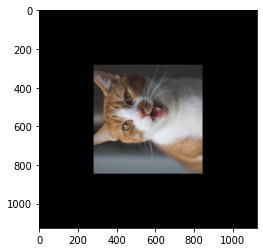

In [37]:
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)  # 반시계 방향으로 90도, 0.5배의 크기로 회전
dst = cv2.warpAffine(image, M, (width, height))
print(f"변환 행렬: \n{M}")

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

변환 행렬: 
[[ 4.00000000e-01  6.92820323e-01 -5.22114317e+01]
 [-6.92820323e-01  4.00000000e-01  7.27211432e+02]]


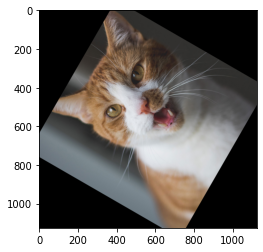

In [38]:
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width/2, height/2), 60, 0.8)
dst = cv2.warpAffine(image, M, (width, height))
print(f"변환 행렬: \n{M}")

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()